## **ASSIGNMENT 2**
# Instructor: Gianfranco Doretto
# Due: October 13, 2022 by the beginning of the lecture
# Student Name: Ali Zafari

The assignment is composed of **three** parts split into **six** tasks.

**Important Instructions**

Before you start solving the assignment make sure you upload the project files to your google drive folder and set the **source** variable to your assignment directory.

**Submission Instructions**

You will need to prepare a folder called

```hw2_YOUR-LAST-NAME_YOUR-FIRST-NAME```

In that folder you want to put
- Your Colab notebook (fill out the Student Name above)
- For every question that requires submitting data you create a subfolder called ```task_NUMBER``` and you put there the files with adequate naming. If we do not understand that something is there you will not get credit!
- For question which requires writing must be done in preassigned places instructed in *italics*. For math, use the latex notation as colab supports latex. For more info on latex use [this](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/00/intro_to_latex.ipynb).

**Submission Helper**

We have put color coded text to make it easier for you to distinguish between types of submission.

<font color='red'>[CODE]</font> tag for a submission requires you to code.

<font color='blue'>[ANSWER]</font> tag for a submission requires you to write something (including math where needed).

<font color='green'>[DATA]</font> tag for a submission requires you to submit corresponding file. This will mostly include image files or graph plot files.

In [1]:
# Mount your MIX Google Drive
from google.colab import drive
drive_mount = "/content/drive"
drive.mount(drive_mount)

# TODO: Set your path to the assignment's image folder
dir_path = "/MyDrive/myCV/Assignment2"
global source
source = drive_mount+dir_path
import os
print(os.listdir(source))

Mounted at /content/drive
['grace_hopper.png', 'task6', '1b.png', 'CS678_Assignment_2.ipynb']


#### Instruction for loading data
1. Make sure you have set the variable **source** in the above block.
2. To get the full path of a file use `os.path.join(source, "<name_of_the_file>")`.
3. For image loading you can use `cv2.imread()` or other libraries.
4. For `.npy` files, use `np.load()`

In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Some Helper Functions
def plot_image(image):
  """
  Plots the image using matplotlib in grayscale. Note that only
  grayscale image is supported.

  Input- image: H x W
  """
  plt.imshow(image, cmap='gray', vmin=0, vmax=255)
  return

def save_image_to_drive(image, name):
  """
  This functions will save the image to the path specified in the variable `source`.
  Make sure you include the image extension in the name. Also it will only save if
  the array is of type `uint8`.

  Input - image: H x W
          name: String containing name of the image you wish to save and extension.
                For e.g. test_image_01.png
  """
  cv2.imwrite(os.path.join(source, name), image.astype(np.uint8))
  return

## Part 1: Image Filtering

**Foreword**: There’s a difference between convolution and cross-correlation: in cross-correlation, you com-
pute the dot product (i.e., `np.sum(F*I[y1:y2,x1:x2]))` between the kernel/filter and each win-
dow/patch in the image; in convolution, you compute the dot product between the flipped kernel/filter and
each window/patch in the image. We’d like to insulate you from this annoying distinction, but we also don’t
want to teach you the wrong stuff. So we’ll split the difference by pointing where you have to pay attention.
We’ll make this more precise in 1D: assume the input/signal `f` has `N` elements (i.e., is indexed by `i` for
`0 ≤ i < N` ) and the filter/kernel `g` has `M` elements (i.e., is indexed by j for `0 ≤ j < M` ). In all cases below,
you can assume zero-padding of the input/signal `f` .


***1D Cross-correlation/Filtering:*** This filter takes the form

\begin{align}
h[i] = \sum_{j=0}^{M-1} g[j]f[i+j].
\end{align}

or each entry `i` is the sum of all the products between the filter at `j` and the input at `i + j` for all valid `j`. If
you want to think of doing this in terms of matrix products, you can think of this as $h_i = g^Tf_{i:i+M-1}$. Of
the two options, this tends to be more intuitive to most people.



***1D Convolution:*** When we do 1D convolution, on the other hand, we re-order the filter last-to-first, and
then do filtering. In signal processing, this is usually reasoned about by index trickery. By definition, 1D
convolution takes the form:

\begin{align}
(f*g)[i] = \sum_{j=0}^{M-1} g[M - j - 1]f[i+j]
\end{align}

which is uglier since we start at `0` rather than `1`. You can verify that as `j` goes `0 → (M − 1)`, the new index
`(M − j − 1)` goes `(M − 1)` → 0.

Rather than deal with annoying indices, if you’re given a filter to apply
and asked to do convolution, you can simply do the following:

(1) at the start of the function and only once,
compute `g = g[::-1]` if it’s 1D or `G = G[::-1,::-1];` for 2D \\
(2) do filtering with this flipped filter

The reason for the fuss is that convolution is commutative $(f ∗ g = g ∗ f )$ and associative $(f ∗ (g ∗ h) =
(f ∗ g) ∗ h)$. As you chain filters together, its is nice to know things like that $(a ∗ b) ∗ c = (c ∗ a) ∗ b$ for all
$a, b, c$. Cross-correlation/filtering does not satisfy these properties. \\

You should watch for this in three crucial places.

- When implementing convolution in Task 1(a) in the function `convolve()`

- When dealing with non-symmetric filters (like directional derivatives $[−1, 0, 1]$). A symmetric filter like the Gaussian is unaffected by the distinction because if you flip it horizontally/vertically, it’s the same. But for asymmetric filters, you can get different results. In the case of the directional derivatives, this flips the sign. This can produce outputs that have flipped signs or give you answers to question that are nearly right but need to be multiplied by −1. Bottom-line: if you have something that’s right except for a -1, and you’re using a directional derivative, then you’ve done it with cross-correlation.

### Task 1: Convolution with filters

A Gaussian filter has filter values that follow the Gaussian probability distribution. Specifically, the
values of the filter are

\begin{align}
\text{1D kernel : } G(x) = \frac{1}{\sqrt{2\pi σ^2}} \exp \left(- \frac{x^2} {2σ^2} \right) \\
\text{2D kernel : } G(x, y) = \frac{1}{2\pi σ^2} \exp \left(- \frac{x^2 + y^2} {2σ^2} \right)
\end{align}
where 0 is the center of the filter (in both 1D and 2D) and $σ$ is a free parameter that controls how much
blurring takes place. One thing that makes lots of operations fast is that applying a 2D Gaussian filter to
an image can be done by applying two 1D Gaussian filters, one vertical and the other horizontal.

<font color='red'>[CODE]</font> **Task 1(a): Complete the function** `convolve()`. Be sure to implement convolution and not cross-correlation/filtering (i.e., flip the kernel as soon as you get it). For consistency purposes, please use zero-padding when implementing convolution. **(10 points)**

**Note: you cannot use any libraries that implement this function. However you can use them to compare your results.**

In [67]:
# TODO: Complete the function
def convolve(image, kernel):
    """
    Return the convolution result: image * kernel.
    Reminder to implement convolution and not cross-correlation!
    Caution: Please use zero-padding.

    Input- image: H x W
           kernel: h x w
    Output- convolve: H x W
    """
    kernel = kernel[::-1,::-1]
    (H, W) = image.shape
    image_padded = np.zeros((H + 1 * 2, W + 1 * 2))
    image_padded[1 : H + 1, 1 : W + 1] = image
    h_out = np.floor(H + 1 * 2 - kernel.shape[0] ).astype(int) + 1
    w_out = np.floor(W + 1 * 2 - kernel.shape[1] ).astype(int) + 1
    output = np.zeros((h_out, w_out))
    b = kernel.shape[0] // 2, kernel.shape[1] // 2
    center_x_0 = b[0]
    center_y_0 = b[1]
    for i in range(h_out):
        center_x = center_x_0 + i
        indices_x = [center_x + l for l in range(-b[0], b[0] + 1)]
        for j in range(w_out):
            center_y = center_y_0 + j
            indices_y = [center_y + l for l in range(-b[1], b[1] + 1)]
            submatrix = image_padded[indices_x, :][:, indices_y]
            output[i][j] = np.sum(np.multiply(submatrix, kernel))
    return output

<font color='green'>[DATA]</font> <font color='blue'>[ANSWER]</font> **Task 1(b): Save the results to your drive** Then describe what Gaussian filtering does to the image in one sentence. Load the image `grace_hopper.png` as the input and apply a Gaussian filter that is 3 × 3 with a standard deviation of σ = 0.572. You can use as many code block you want as long as you submit the thing we care about. **(4 points)**

**Note:** you cannot use any libraries that implement this function. However you can use them to compare your results.

You can use the helper function provided at the begining of the colab. You can choose not use them and may create your own.

*Answer*

**Gaussian kernel acts like a low pass filter by avergaing pixel values covering its kernel, thus the output will be a smoother version of the input.**

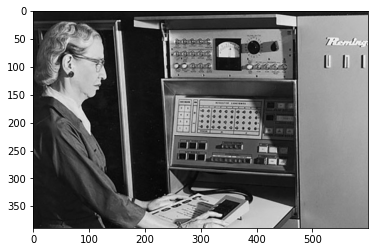

In [14]:
image = cv2.imread(source + '/grace_hopper.png', cv2.IMREAD_GRAYSCALE)
plot_image(image)

kernel = np.zeros((3, 3))
for i in range(3):
  for j in range(3):
    kernel[i, j] = (1/np.sqrt(np.pi*2*0.572**2)*np.exp(-((i-1)**2+(j-1)**2)/(2*0.572**2)))
kernel_un_normalized = kernel.copy()
kernel_normalized = (kernel / kernel.sum()).copy()

output = convolve(image, kernel_normalized)

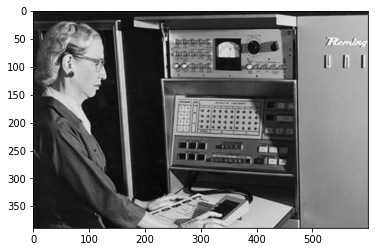

In [15]:
plot_image(output)

In [18]:
save_image_to_drive(output, '1b.png')

<font color='blue'>[ANSWER]</font> **Task 1(c): Discuss** why it is a good idea for you to use a smoothing filter to sum up to 1. **(3 points)**

*(Hints: You may experiment with your implementation. As an experiment to help deduce why, observe that if you sum all the values with of the
Gaussian filter in (b), you should get a sum close to 1. If you are very particular about this, you can make it exactly sum to 1 by dividing all filter values by their sum. When this filter is applied to ’grace hopper.png’, what are the output intensities (min, max, range)? Now consider a Gaussian filter of size 3 × 3 and standard deviation σ = 2 (but do not force it to sum to 1 – just use the values). Calculate the sum of all filter values in this case. What happens to the output image intensities in this case?)*

*Start Discussion here*

**As calculated by the block code below, the maximum of pixel values when the Guassian kernel does not sum to one, will be greater than 255 (the maximum possbile pixel value in a 8-bit grayscale image). This will result in saturation of specific areas of image and losing the details on those regions. By keeping the range of convolved image between zero and 255, we can be sure that the final image will not lose its input structure.**

- Normalized (sum=1) Gaussian Kernel ouput range: 
 - **min: 3.059** 
 - **max: 248.329** 
 - **range: 245.270**

- Un-normalized (sum=1.434) Gaussian Kernel ouput range: 
 - **min: 4.386** 
 - **max: 356.083** 
 - **range: 351.697**

In [24]:
output_un_normalized = convolve(image, kernel_un_normalized)
output_normalized = convolve(image, kernel_normalized)

In [25]:
print(f'Un-normalized Gaussian Kernel output image pixel range: \n\tmin: {output_un_normalized.min():.3f}, max: {output_un_normalized.max():.3f}, range: {output_un_normalized.max()-output_un_normalized.min():.3f}')
print(f'Normalized Gaussian Kernel output image pixel range: \n\tmin: {output_normalized.min():.3f}, max: {output_normalized.max():.3f}, range: {output_normalized.max()-output_normalized.min():.3f}')

Un-normalized Gaussian Kernel output image pixel range: 
	min: 4.386, max: 356.083, range: 351.697
Normalized Gaussian Kernel output image pixel range: 
	min: 3.059, max: 248.329, range: 245.270


Consider the image as a function $I(x, y)$ and $I : R^2 → R$. When working on edge detection, we often
pay a lot of attention to the derivatives. Denote the “derivatives”:

\begin{align}
I_x(x,y) = I(x+1,y) - I(x-1,y) ≈ 2 \frac{\partial I}{\partial x} (x,y) \\
I_y(x,y) = I(x,y+1) - I(x,y-1) ≈ 2 \frac{\partial I}{\partial y} (x,y)
\end{align}

where $I_x$ is the twice the derivative and thus off by a factor of 2. This scaling factor is not a concern since the units of the image are made up and anyway scale the derivative and so long as you are consistent, things are fine.

<font color='blue'>[ANSWER]</font> **Task 1(d): Derive** the colvolution kernels for derivatives:

(1) $k_x \in R^{1 \times 3} : I_x = I * k_x$ \\
(2) $k_y \in R^{3 \times 1} : I_y = I * k_y$ 

**(4 points)**

*Start Derivation here*

(1) $k_x \in R^{1 \times 3} : I_x = I * [+1 \quad0 \quad-1]$ \\
(2) $k_y \in R^{3 \times 1} : I_y = I * [+1 \quad0 \quad-1]^T$ 

<font color='red'>[CODE]</font> **Task 1(e): Complete the function** `edge_detection()` below whose output is gradient magnitude. **(5 points)**

In [43]:
# TODO: Complete the function
def edge_detection(image):
    """
    Return Ix, Iy and the gradient magnitude of the input image

    Input- image: H x W
    Output- Ix, Iy, grad_magnitude: H x W
    """
    # TODO: Fix kx, ky
    kx = np.array([[1, 0, -1]])  # 1 x 3
    ky = np.array([[1], [0], [-1]])  # 3 x 1

    Ix = convolve(image, kx)[1:-1,:]
    Iy = convolve(image, ky)[:,1:-1]

    # TODO: Use Ix, Iy to calculate grad_magnitude
    grad_magnitude = np.sqrt((Ix/2)**2 + (Iy/2)**2)

    return Ix, Iy, grad_magnitude

In [40]:
image = cv2.imread(source + '/grace_hopper.png', cv2.IMREAD_GRAYSCALE)
output_normalized = convolve(image, kernel_normalized)

In [41]:
image.shape, output_normalized.shape

((389, 600), (389, 600))

In [46]:
_, _, original_grad = edge_detection(image)
_, _, smoothen_grad = edge_detection(output_normalized)

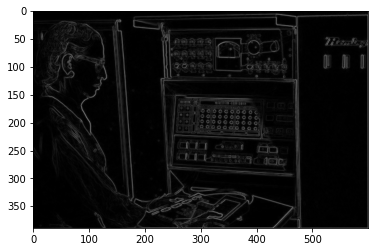

In [49]:
plot_image(original_grad)
save_image_to_drive(original_grad, '1f_original.png')

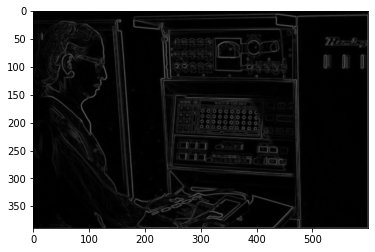

In [50]:
plot_image(smoothen_grad)
save_image_to_drive(smoothen_grad, '1f_lowpass.png')

<font color='green'>[DATA]</font> <font color='blue'>[ANSWER]</font> **Task 1(f):** Use original `grace_hopper.png` image and the gaussian convolution version as inputs respectively and use `edge_detection()`. Save both version and include it in your submission. **Discuss** the difference between the two images in no more than three sentences. **(4 points)**

*Start your Discussion here*

**Original image gradient magnitudes are somehow noisy and show edges on some areas which is not really an edge. The low passed image (Gaussian smoothed) have lower valued of gradient but the edges are more reliably captured.**

## Part 2: Corners

This question looks long, but that is only because there is a fairly large amount of walk-through and formalizing stuff. The resulting solution, if done properly, is certainly under 10 lines. If you use filtering, please use `scipy.ndimage.convolve()` to perform convolution whenever you want to use it. Please use **zero padding** for consistency purposes `(Set mode=‘constant’)`.


Foreword: While edges can be useful, corners are often more informative features as they are less common. In this section, we implement a Harris Corner Detector (see: https://en.wikipedia.org/wiki/Harris Corner Detector) to detect corners. Corners are defined as locations $(x, y)$ in the image where a small change any direction results in a large change in intensity if one considers a small window centered on $(x, y)$ (or, intuitively, one can imagine looking at the image through a tiny hole that’s centered at $(x, y)$). This can be contrasted with edges where a large intensity change occurs in only one direction, or flat regions where moving in any direction will result in small or no intensity changes. Hence, the Harris Corner Detector considers small windows (or patches) where a small change in location leads large variation in multiple directions (hence corner detector).


Let’s consider a grayscale image where $I(x, y)$ is the intensity value at image location $(x, y)$. We can calculate the corner score for every pixel $(i, j)$ in the image by comparing a window W centered on $(i, j)$ with that same window centered at $(i + u, j + v)$. To be specific: a window of size $2d + 1$ centered on $(i, j)$ is a the set of pixels between $i − d$ to $i + d$ and $j − d$ to $j + d$. Specifically, we will compute the sum of square differences between the two,


\begin{align}
E(u,v) = \sum_{x,y \in W} [I(x+u,y+v)] - I(x,y)]^2
\end{align}

or, for every pixel $(x, y)$ in the window $W$ centered at $i, j$, how different is it from the same window, shifted over $(u, v)$. This formalizes the intuitions above:

- If moving $(u, v)$ leads to no change for all $(u, v)$, then $(x, y)$ is probably flat.
- If moving (u, v) in one direction leads to a big change and adding $(u, v)$ in another direction leads to a small change in the appearance of the window, then $(x, y)$ is probably on an edge.
- If moving any $(u, v)$ leads to a big change in appearance of the window, then $(x, y)$ is a corner.

You can compute this $E(u, v)$ for all $(u, v)$ and at all $(i, j)$.

In [101]:
import scipy

**Task 2: Corner Score**

Your first task is to write a function that calculates this function for all pixels $(i, j)$ with a fixed offset $(u, v)$ and window size $W$ . In other words, if we calculate $S = cornerscore(u, v)$, $S$ is an image such that $S_{ij}$ is the sum-of-squared differences between the window centered on $(i, j)$ in $I$ and the window centered on $(i + u, j + v)$ in $I$. The function will need to calculate this function to every location in the image. This is doable via a quadruple for-loop (for every pixel $(i, j)$, for every pixel $(x, y)$ in the window centered at $(i, j)$, compare the two). However, you can also imagine doing this by \\
(a) offsetting the image by $(u, v)$  \\
(b) taking the squared difference with the original image \\
(c) summing up the values within a window using convolution. Note: If you do this by convolution, use zero padding for offset-window values that lie outside of the image.

<font color='red'>[CODE]</font> **Task 2(a): Complete the function** `corner_score()` which takes as input an image, offset values $(u,v)$ and window size $W$. The function computes the response $E(u, v)$ for every pixel. We can look at, for instance the image of $E(0, y)$ to see how moving down $y$ pixels would change things and the image of $E(x, 0)$ to see how moving right $x$ pixels would change things. **(10 points)**

*Hint: You can use `np.roll` for offsetting by $u$ and $v$.*

In [102]:
# TODO: Complete the function
def corner_score(image, u=5, v=5, window_size=(5, 5)):
    """
    Given an input image, x_offset, y_offset, and window_size,
    return the function E(u,v) for window size W
    corner detector score for that pixel.
    Use zero-padding to handle window values outside of the image.

    Input- image: H x W
            u: a scalar for x offset
            v: a scalar for y offset
            window_size: a tuple for window size

    Output- results: a image of size H x W
    """
    image_offset = np.roll(image, shift=(u, v))
    squared_difference = (image-image_offset)**2
    window_kernel = np.ones(window_size) / (window_size[0]*window_size[1])
    output = scipy.signal.convolve2d(squared_difference, window_kernel, mode='same')
    return output

In [106]:
for u, v in [(0, 5), (0, -5), (5, 0), (-5, 0)]:
  save_image_to_drive(corner_score(image, u=u, v=v), f'2b_u={u}_v={v}.png')

<font color='green'>[DATA]</font> **Task 2(b) Save results** for `grace_hopper.png` for $(u, v) = \{ (0,5), (0,-5), (5,0), (-5,0) \}$ and window size $(5,5)$ **(3 points)**

<font color='blue'>[ANSWER]</font> **Task 2(c)** Early work by Moravec [1980] used this function to find corners by computing $E(u, v)$ for a range of offsets and then selecting the pixels where the corner score is high for all offsets. Discuss below in few sentences why checking all the us and vs might be impractical in a few sentences. **(3 points)**

*Start your discussion here*

**u and v range of values will be the width and height of the input image, respectively. Therefore to compare them all it will follow a complexity of $O(N^2)$ which gets impractical by increasing the input image resolution.**

### Task 3: Harris Corner Detector

For every single pixel $(i, j)$, you now have a way of computing how much changing by $(u, v)$ changes the appearance of a window (i.e., $E(u, v)$ at $(i, j)$). But in the end, we really want a single number of “cornerness” per pixel and don’t want to handle checking all the $(u, v)$ values at every single pixel $(i, j)$. You’ll implement the cornerness score invented by Harris and Stephens [1988].

Harris and Stephens recognized that if you do a Taylor series of the image, you can build an approximation of $E(u, v)$ at a pixel $(i, j)$. Specifically, if $I_x$ and $I_y$ denote the image of the partial derivatives of $I$ with respect to $x$ and $y$ (computable via $k_x$ and $k_y$ from above), then

\begin{align}
E(u,v) \approx \sum_{W} (I^2_x u^2 + 2I_xI_yuv + I^2_yv^2) = [u,v]
\begin{bmatrix}
\sum_w I_x^2 & \sum_w I_xI_y\\
\sum_W I_xI_y & \sum_W I_y^2\\
\end{bmatrix} [u, v]^T = [u, v] M [u, v]^T
\end{align}

This matrix $M$ has all the information needed to approximate how rapidly the image content changes within a window near each pixel and you can compute M at every single pixel $(i, j)$ in the image. To avoid extreme notation clutter, we assume we are always talking about some fixed pixel $i, j$, the sums are over $x, y$ in a $2d + 1$ window $W$ centered at $i, j$ and any image (e.g., $I_x$ ) is assumed to be indexed by $x, y$. But in the interest of making this explicit, we want to compute the matrix $M$ at $i, j$. The top-left and bottom-right elements of the matrix $M$ for pixel $i, j$ are:

\begin{align}
M[0,0] = \sum_{i-d \le x \le i+d \\ i-d \le y \le i+d} I_x(x,y)^2\\ 
M[1, 1] = \sum_{i-d \le x \le i+d \\ i-d \le y \le i+d} I_y(x,y)^2\\ 
\end{align}

If you look carefully, you may be able to see that you can do this by convolution – with a filter that sums things up.

What does this do for our lives? We can decompose the $M$ we compute at each pixel into a rotation matrix $R$ and diagonal matrix $diag([λ_1 , λ_2 ])$ such that (specifically an eigen-decomposition):

\begin{align}
M = R^{-1} diag([\lambda_1, \lambda_2])R
\end{align}

where the columns of $R$ tell us the directions that $E(u, v)$ most and least rapidly changes, and $λ_1 , λ_2$ tell us the maximum and minimum amount it changes. In other words, if both $λ_1 and λ_2$ are big, then we have a corner; if only one is big, then we have an edge; if neither are big, then we are on a flat part of the image. Unfortunately, finding eigenvectors can be slow, and Harris and Stephens were doing this over 30 years ago. Harris and Stephens had two other tricks up their sleeve. First, rather than calculate the eigenvalues directly, for a 2x2 matrix, one can compute the following score, which is a reasonable measure of what the eigenvalues are like:

\begin{align}
R= \lambda_1\lambda_2 - \alpha(\lambda_1 - \lambda_2)^2 = det(M) - αtrace(M)^2
\end{align}

which is far easier since the determinants and traces of a 2x2 matrix can be calculated very easily (look this up online). Pixels with large positive $R$ are corners; pixels with large negative $R$ are edges; and pixels with low $R$
are flat. In practice $α$ is set to something between $0.04$ and $0.06$. Second, the sum that’s being done weights pixels across the window equally, when we know this can cause trouble. So instead, Harris and Stephens computed a $M$ where the contributions of $I_x$ and $I_y$ for each pixel $(i, j)$ were weighted by a Gaussian kernel.

**Haris Corner Implementation Pipeline**

(*Note: you can design your own implementation as long as it does not uses external libraries or function which direclty implements Harris Corner detection.*)

1. In your implementation, you should first figure out how to calculate M for all pixels just using a straight-forward sum. You can compute it by brute force (quadruple for-loop) or convolution (just summing over a window). In general, it’s usually far easier to write a slow-and-not-particularly-clever version that does it brute force. This is often a handful of lines and requires not so much thinking. You then write a version that is convolutional and faster but requires some thought. This way, if you have a bug, you can compare with the brute-force version that you are pretty sure has no issues. You can store $M$ as a 3-channel image where, for each pixel $(i, j)$ you store $M_{1,1}$ in the first channel, $M_{1,2}$ in the second and $M_{2,2}$ in the third. Storing $M_{2,1}$ is unnecessary since it is the same as $M_{1,2}$.

2. You should then figure out how to convert $M$ at every pixel into $R$ at every pixel. This requires of operations (det, trace) that have closed form expressions for 2x2 matrices that you can (and should!) look up. Additionally, these are expressions that you can do via element-wise operations (+, * ) on
the image representing the elements of $M$ per pixel.

3. Finally, you should switch out summing over the window (by convolution or brute force) to summing over the window with a Gaussian weight and by convolution. The resulting operation will be around five cryptic lines that look like magic but which are doing something sensible under the hood.

<font color='red'>[CODE]</font> **Task 3(a) Implement** `harris_detector()` function. **(15 points)**

**Note:** You cannot call a library function that has already implemented the Harris Corner Detector to solve the task. You can, however, look at where Harris corners are to get a sense of whether your implementation is doing well.



In [128]:
# TODO: Complete the function
def harris_detector(image, window_size=(5, 5)):
    """
    Given an input image, calculate the Harris Detector score for all pixels
    You can use same-padding for intensity (or 0-padding for derivatives)
    to handle window values outside of the image.

    Input- image: H x W
    Output- results: a image of size H x W
    """
    k = 0.05

    Ix = scipy.signal.convolve2d(image, np.array([[-1, 0, 1]]), mode='same')
    Iy = scipy.signal.convolve2d(image, np.array([[-1], [0], [1]]), mode='same')

    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix*Iy

    guass_win = np.zeros(window_size)
    for y in range(window_size[0]):
        for x in range(window_size[1]):
            guass_win[y,x] = 1/(2*np.pi*5)*np.exp(-(x**2+y**2)/(2*5**2))    
    guass_win = (guass_win / guass_win.sum()).copy()

    hxx = scipy.signal.convolve2d(Ixx, guass_win, boundary='fill', mode='same')
    hyy = scipy.signal.convolve2d(Iyy, guass_win, boundary='fill', mode='same')
    hxy = scipy.signal.convolve2d(Ixy, guass_win, boundary='fill', mode='same')
    
    det = hxx * hyy - hxy**2
    tr = hxx + hyy

    response = det - k * (tr**2)

    return response

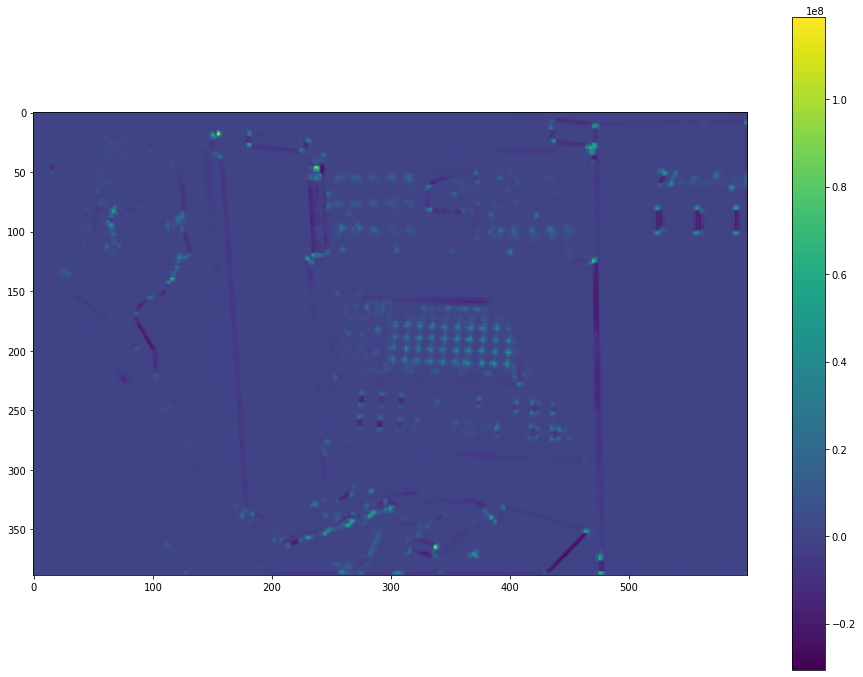

In [129]:
harris_measure = harris_detector(image)
fig = plt.figure(figsize=(16, 12))
heat = plt.imshow(harris_measure)
plt.colorbar(heat)
plt.savefig(os.path.join(source, '3b.png'))
plt.show()

<font color='green'>[DATA]</font> **Task 3(b)** Generate a Harris Corner Detector score for every point in a grayscale version of ’grace hopper.png’, and save these scores as a heatmap image and include in your submission. *(Use matplotlib to visualize and save the heatmap.)* **(3 points)**

## Part 3: RANSAC and Fitting Models

**NOTE: In this part you don't have to submit any code but you might have to code in order to get to the results.**

*(Please refer to class notes for Overview on Homography. Also you are free to lookup online.)*

### Task 4: RANSAC Theory

In this section, suppose we are fitting a 3D plane (i.e., $ax + by + cz + d = 0$). A 3D plane can be defined by 3 points in general position (2 give a line). Plane fitting happens when people analyze point clouds to reconstruct scenes from laser scans. Each question depends on on the previous one. If you are not sure about one previous answer, give an equation in terms of a set of variables. In keeping with other notation that you may find elsewhere, we will refer to the model that is fit in the inner loop of RANSAC as the putative model.

<font color='blue'>[ANSWER]</font> **Task 4(a)** The minimum number of 3D points needed to sample in an iteration to compute a putative model. **(3 points)**

*Ans*

**To spcify a 3D plane we need at least 3 points in the 3D space.**

<font color='blue'>[ANSWER]</font> **Task 4(b)** Determine the probability that the data picked for to fit the putative model in a single iteration fails, assuming that the outlier ratio in the dataset is 0.2 and we are fitting 3D planes. **(3 points)**

*Ans*

**We should calculate the probability of having at least ONE outlier in the 3 points sampled:**

\begin{align*}
P(\textrm{at least 1 outlier})&=\sum_{i=1}^3 \binom{n}{i}P_{outlier}^i(1-P_{outlier})^{3-i}\\
&=3\times 0.2(0.8)^2+3\times0.2^2(0.8)+1\times0.2^3\\
&=0.488
\end{align*}


<font color='blue'>[ANSWER]</font> **Task 4(c)** Determine the minimum number of RANSAC trials needed to have $≥ 95%$ chance of success, assuming that the outlier ratio in the dataset is 0.2 and we are fitting planes. **(3 points)**

*(Hint: You can do this by explicit calculation or by search/trial and error with numpy.)*

*Ans*

**$N$ will be the minimum number of trials to have 0.95 chance of succes**
\begin{align*}
1-(1-(1-0.2)^3)^N &\geq 0.95\\
N&\geq\frac{\log(1-0.95ca)}{\log(1-(1-0.2)^3)}\\
N&\geq 4.17
\end{align*}
**Therefore we need to do at least 5 trials of RANSAC.**

### Task 5: Fitting Linear Transforms

Suppose we have a set of 2D correspondences $([x^{'}_i , y_i^{'} ] ↔ [x_i , y_i ])$ for $1 ≤ i ≤ N$ .

<font color='blue'>[ANSWER]</font> **Task 5(a):** Suppose we are fitting a linear transformation, which can be parameterized by a matrix $M \in R^{2 \times 2}$ (i.e. $[x^{'}, y^{'}]^T = M[x,y]^T$)

Answer the number of degrees of freedom $M$ has and the minimum number of 2D
correspondences that are required to fully constrain or estimate $M$. **(3 points)**

*Ans*

Degrees of freedom in M: **3** and to fully estimate $M$ we need at least 2 correspondences.

<font color='blue'>[ANSWER]</font> **Task 5(b):** Suppose we want to fit $[x_i^{'}, y_i^{'}]^T = M[x_i, y_i]^T$. We would like you formulate the fitting problem in the form 

\begin{align}
argmin_{m \in R^4} || Am-b ||_2^2
\end{align}

where $m ∈ R^4$ contains all the parameters of $M$, $A$ depends on the points $[x_i , y_i ]$ and $b$ depends on the points $[x_i^{'} , y_i^{'} ]$.

Write below the form of $A$, $m$, and $b$ **(3 points)**

*Ans*

\begin{align*}
|||Am-b||_2^2=m^T(AA^T)m-2m^T(A^Tb)+||b||^2
\end{align*}
We take derivative of the above formula and set it to zero, resulting in:
\begin{align*}
m=(A^TA)^{-1}(A^Tb)
\end{align*}

### Task 6: Fitting Affine Transforms

Suppose we have a set of 2D correspondences $[x_i^{'} , y_i^{'}] ↔ [x_i , y_i]$ for $1 ≤ i ≤ N$.

Files: We give an actual set of points in `task6/points case 1.npy` and `task6/points_case_2.npy`: each row of the matrix contains the data $[x_i, y_i, x_i^{'} , y_i^{'}]$ representing the correspondence. You do not need to turn in your code but you may want to write some functions that loads and plots data.

<font color='blue'>[ANSWER]</font> **Task 6(a)** Fit a tranformation of the form

\begin{align}
[x^{'}, y^{'}]^T = S[x,y]^T + t, S \in R^{2 \times 2}, t \in R^{2 \times 1}
\end{align}

by setting up a problem of the form

\begin{align}
argmin_{v \in R^6} || Av-b ||_2^2
\end{align}

and solving it via least squares.

Please provide $(S, t)$ below for file `points_case_1.npy` **(5 points)**

*Helpful Pipepline:*
- Write some code that loads the matrix, shuffles data and calls `np.linalg.lstsq`.

*Ans*

<font color='green'>[DATA]</font> **Task 6(b)** Make as scatterplot of the points $[x_i^{'} , y_i^{'}], [x_i , y_i]$ and $S[x,y]^T + t$ in one figure with different colors. Do this for both `points_case_1.npy` and `point_case_2.npy`. In other words, there should be two plots, each of which contains three sets of N points.

Save the plots and include in your submission. **(3 points)**

*(Hint: Look at `plt.scatter` and `plt.savefig`. For drawing the scatterplot, you can do `plt.scatter(xy[:,0],xy[:,1],1)`. The last argument controls the size of the dot and you may want this to be small so you can set the pattern. You can save the plot using `plt.savefig()` function.)*

<font color='blue'>[ANSWER]</font> **Task 6(c)** Please answer the following: how well does an affine transform describe the relationship between $[x, y] ↔ [x^{'} , y^{'}]$ for `points_case_1.npy` and `point_case_2.npy`? You should describe this in two to three sentences. **(4 points)**

*(Hint: what properties are preserved by each transformation?)*



*Ans*